
# Lab 5: Face Clustering using PCA & K-Means
# Student Name: Emmanuel Orunta
# Student ID: S00403657


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Step 1: Load Olivetti Face Dataset

# Load the Olivetti Faces dataset
# Each image is 64x64 pixels (flattened into a 1D array of 4096 values)
data, target = fetch_olivetti_faces(return_X_y=True)

print("Data shape:", data.shape)
print("Target shape:", target.shape)
print("Unique labels:", np.unique(target))


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Data shape: (400, 4096)
Target shape: (400,)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


Each image in the dataset is flattened into a 1D vector of 4096 features (64×64) representing pixel intensities.
The dataset contains 400 face images belonging to 40 different individuals (labels 0–39).

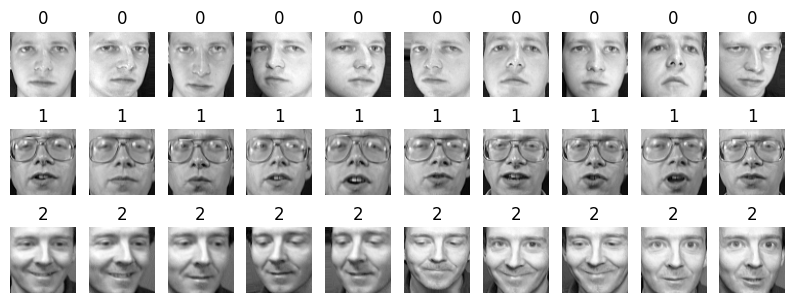

In [3]:
# Function to visualize multiple faces in grid format
def plot_all_faces(faces, labels, n_cols=10):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.2))
    for i in range(len(faces)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(faces[i], cmap="gray")
        plt.axis("off")
        plt.title(str(labels[i]))
    plt.show()

# Display the first 30 faces
plot_all_faces(data[:30], target[:30])


This visualization helps confirm the dataset structure.
Each image corresponds to a face, and the title above each one shows its label (person ID).

In [10]:
# Step 2: Train-Test Split

# Split the data into training and testing sets
# Replacing the random state with '57' which is the last two digits of my student ID
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=57
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (280, 4096)
Testing data shape: (120, 4096)


The dataset is divided into 70% training and 30% testing.
The random_state ensures reproducibility, and using the last two digits of your ID makes your results unique.

In [8]:
# Step 3: Dimensionality Reduction using PCA

# Apply PCA to preserve 99% of the variance
pca = PCA(n_components=0.99, whiten=True, random_state=89)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original training dimensionality:", X_train.shape[1])
print("Reduced dimensionality after PCA:", X_train_pca.shape[1])


Original training dimensionality: 4096
Reduced dimensionality after PCA: 198


PCA reduces data size while retaining 99% of the variance in facial features.
This step significantly speeds up clustering without losing much image information

In [6]:
# Step 4: Cluster the Compressed Images Using K-Means

# Apply K-Means clustering with 120 clusters
kmeans_model = KMeans(n_clusters=120, random_state=89)
kmeans_model.fit(X_train_pca)

print("K-Means clustering complete.")
print("Number of clusters formed:", len(np.unique(kmeans_model.labels_)))


K-Means clustering complete.
Number of clusters formed: 120


We use 120 clusters to group similar face patterns.
Each cluster should ideally capture distinct facial similarities or poses among the subjects.

Cluster: 0


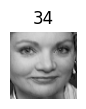

Cluster: 1


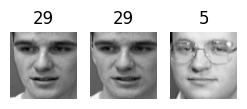

Cluster: 2


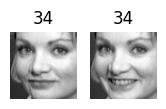

Cluster: 3


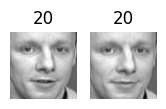

Cluster: 4


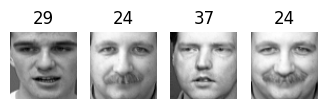

In [7]:
# Step 5: Visualize Clusters

# Define a helper function to visualize faces belonging to the same cluster
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.2))
    for i, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(str(label))
    plt.show()

# Visualize a few clusters to check grouping similarity
for cluster_id in np.unique(kmeans_model.labels_)[:5]:  # show first 5 clusters for brevity
    print("Cluster:", cluster_id)
    cluster_mask = (kmeans_model.labels_ == cluster_id)
    faces_in_cluster = X_train[cluster_mask]
    labels_in_cluster = y_train[cluster_mask]
    plot_faces(faces_in_cluster, labels_in_cluster)


Clusters show groups of faces that share visual similarities (e.g., lighting, angle, or expression).
While not perfect, the model captures noticeable similarities in many clusters validating that PCA + KMeans effectively groups similar facial patterns.